In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
import glob
import os
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
os.chdir('cotton')
df=pd.read_csv('../climate/Latitudes.csv')

In [3]:

df=df.replace('Komaram Bheem-Asifabad','KomaramBheem-Asifabad')
df=df.replace('Warangal Rural','WarangalRural')
df=df.replace('Warangal Urban','WarangalUrban')

In [4]:

DIR=glob.glob('*.out')
yields = []
sett=set()
feature_df = []

dists = []
densities = []

for file in DIR:
    dist=file.split('_')[0][6:]
    plant_density=file.split('_')[1]
    sett.add(dist)
    with open(file,'r') as f:
        lines=f.readlines()
        yiel=(lines[4].split('         '))[3]
        res = "*"
        for c in lines[4]:
            if res[-1]== ' ' and c == ' ':
                continue
            else :
                res += c
        yields.append(float(res.split(' ')[4]))
        dists.append(dist)
        densities.append(plant_density)
        

In [5]:
#creating a dataframe for input and output parameters
feature_data = pd.DataFrame()


In [6]:
feature_data["District"] = dists
feature_data["Density"] = [float(x) for x in densities]
feature_data["Yield"] = yields


In [7]:
lats = [float(df.loc[df.District==d]['Latitude'])  for d in list(feature_data["District"])]

In [8]:
feature_data['Latitude']=lats

In [9]:
dist_ids = {d:i for i,d in enumerate(sorted(list(set(dists))))}

In [10]:
DistrictId = [dist_ids[d]  for d in list(feature_data["District"])]

In [11]:
feature_data["DistrictId"] = DistrictId

In [12]:
feature_data.to_csv('./FEATURES.csv')

In [13]:
feature_data.corr()

,Density,Yield,Latitude,DistrictId
Density,1.000000,-0.045801,0.000000,0.000000
Yield,-0.045801,1.000000,-0.793272,0.409692
Latitude,0.000000,-0.793272,1.000000,-0.212807
DistrictId,0.000000,0.409692,-0.212807,1.000000


In [14]:
def create_model(optimizer='adam',init_mode='uniform',dropout_rate=0.0,learn_rate=0.001):
    opts={'adam':optimizers.Adam(learn_rate),'sgd':optimizers.SGD(learn_rate),'rms':optimizers.RMSprop(learn_rate)}
    opt=opts[optimizer]
    model=Sequential()
    model.add(Dense(5,input_dim=3,kernel_initializer=init_mode,activation='relu'))
    model.add(Dense(6,activation='relu'))
    model.add(Dense(1,kernel_initializer=init_mode,activation='sigmoid'))
    model.compile(loss='mean_absolute_error',optimizer=opt)
    return model

In [15]:
# After hyper-parameter tuning through grid search, we have obtained the above parameters as best fit

In [16]:
feature_data['Yield'].max()

2946.0

In [17]:
feature_data['Yield']=feature_data['Yield']/3000 

In [18]:
Xtr,Xte,ytr,yte=train_test_split(feature_data[['DistrictId','Latitude','Density']],feature_data['Yield'],test_size=0.1) 

In [19]:
"""batch_size = [128]
epochs = [1,10,50,100]
optimizer=['rms',adam]
init_mode=['normal','uniform']
dropout_rate=[0.1,0]
learn_rate=[0.001,0.01,0.1,1]
param_grid=dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer,init_mode=init_mode,dropout_rate=dropout_rate,learn_rate=learn_rate)
grid=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=3)"""


"batch_size = [128]\nepochs = [1,10,50,100]\noptimizer=['rms',adam]\ninit_mode=['normal','uniform']\ndropout_rate=[0.1,0]\nlearn_rate=[0.001,0.01,0.1,1]\nparam_grid=dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer,init_mode=init_mode,dropout_rate=dropout_rate,learn_rate=learn_rate)\ngrid=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=3)"

In [20]:
model = create_model()

In [20]:
model.summary()

NameError: name 'model' is not defined

In [21]:
history = model.fit(Xtr,ytr,validation_data=(Xte,yte),epochs=70)

Train on 139 samples, validate on 16 samples
Epoch 1/70
139/139 [==============================] - 0s 768us/step - loss: 0.2113 - val_loss: 0.2269
Epoch 2/70
139/139 [==============================] - 0s 287us/step - loss: 0.2023 - val_loss: 0.2168
Epoch 3/70
139/139 [==============================] - 0s 237us/step - loss: 0.1917 - val_loss: 0.2047
Epoch 4/70
139/139 [==============================] - 0s 165us/step - loss: 0.1790 - val_loss: 0.1902
Epoch 5/70
139/139 [==============================] - 0s 129us/step - loss: 0.1645 - val_loss: 0.1738
Epoch 6/70
139/139 [==============================] - 0s 165us/step - loss: 0.1472 - val_loss: 0.1542
Epoch 7/70
139/139 [==============================] - 0s 179us/step - loss: 0.1282 - val_loss: 0.1313
Epoch 8/70
139/139 [==============================] - 0s 122us/step - loss: 0.1076 - val_loss: 0.1057
Epoch 9/70
139/139 [==============================] - 0s 258us/step - loss: 0.0905 - val_loss: 0.0791
Epoch 10/70
139/139 [================

In [22]:
res = model.predict(Xtr)

res = np.reshape(res,(-1,))

In [23]:
#res is our prediction
#ytr is actual output

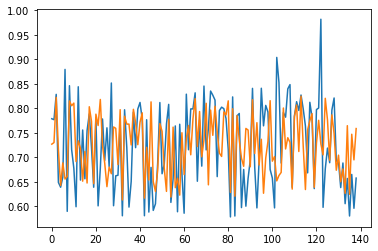

In [24]:

plt.plot(list(range(len(ytr))),ytr[:])
plt.plot(list(range(len(res))),res[:])
#As we can see in the below graph the model fits the data pretty well except for some outliers

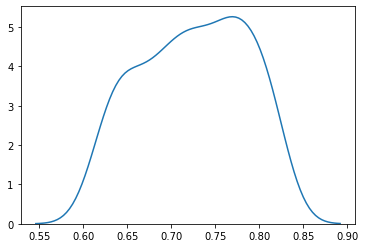

In [25]:
sns.kdeplot(res,clip=(0.4,0.96))

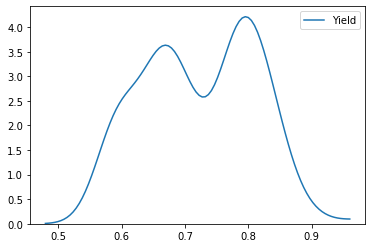

In [26]:
sns.kdeplot(ytr,clip=(0.4,0.96))